# Bioinformática y Análisis Genómico
# 4º curso Grado en Bioquímica - Mención en Biotecnología
# Curso 2020/2021
## Práctica 5.1: Representación 2D proteinas plegadas
### Profesora: Ana Belen Romero Losada


## Introducción al paquete pyplot


Cargamos el paquete de **pyplot**, el cual está dentro de **matplotlib**. Tiene influencias de matlab y está incluido dentro de la instación de *Anaconda3*. Parece que no está instalado en *Anaconda Bioinformatics*, así que aseguraros de abrir jupyter desde *Anaconda3* para no tener que instalarlo. 
Igualmente, para instalar paquetes en el terminal de Anaconda (tanto *Anaconda3* como *Bioinformatics*) se usa la función: ***pip install NombreDePaquete***

In [20]:
from matplotlib import pyplot

Pyplot tiene distintos plots, como barplots, boxplots, pieplots, etc. El mas usado y más versatil es *plot*. Al igual que la función *plot* de **ggplot** en R, puede representar gráficos de líneas y/o puntos. Además de ser altamente personalizable.

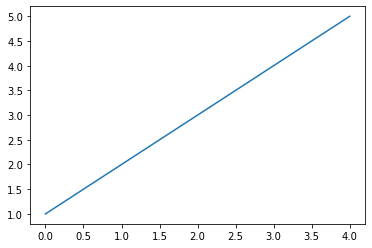

In [21]:
#Es una funcion muy versatil
#Solo recibe números aislados o listas. Al darle una sola lista...
pyplot.plot([1,2,3,4,5])
#...se genera un grafico de lineas en el que los valores dados son los valores del ejeY y usa como
#valores del ejeX las posiciones de los elementos del objeto


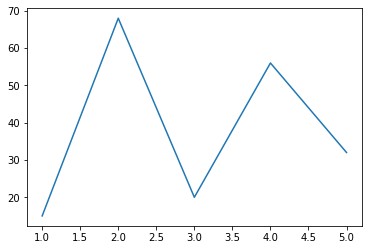

In [26]:
#si le damos dos listas, va a tomar el primero como ejeX y el segundo como ejeY
pyplot.plot([1,2,3,4,5],[15,68,20,56,32])


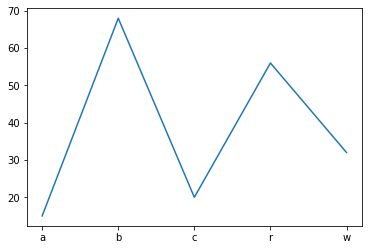

In [27]:
pyplot.plot(["a","b","c","r","w"],[15,68,20,56,32])
#tambien funciona con carácteres en el ejeX a modo de categorías

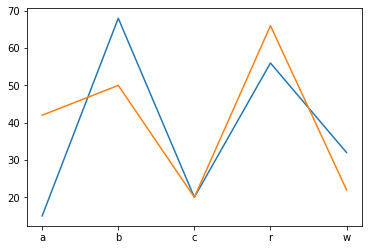

In [29]:
pyplot.plot(["a","b","c","r","w"],[15,68,20,56,32])
pyplot.plot(["a","b","c","r","w"],[42,50,20,66,22])
#para representar dos líneas en el mismo gráfico no se usa una función auxiliar como *lines* en R. En su lugar
#se llama dos veces a la función.

Existe un código usado para personalizar el gráfico. En R cuando queríamos que solo aparecienran puntos se usaba el argumento "o", y cuando solo queríamos líneas "l". En pyplot se usa, por ejemplo, "." para puntos, "o" para círculos, "-" para líneas simples y "--" para líneas discontinuas. En al imagen que os adjunto en la carpeta de esta práctica se recogen muchos de los símbolos que se pueden usar. Además, se pueden combinar: "or" generará círculos rojos, "-b" líneas azules...

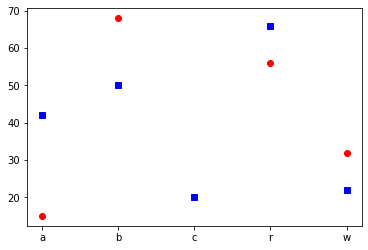

In [31]:
pyplot.plot(["a","b","c","r","w"],[15,68,20,56,32],'ro')
pyplot.plot(["a","b","c","r","w"],[42,50,20,66,22],'bs')

## Preparamos los datos para poder representarlos en pyplot.

Guardamos en una tupla el resultado del algoritmo de **Enfriamiento Simulado** y partimos desde aquí sin tener que volver a correr el algoritmo.

In [4]:
result =('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV',
'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES')

result

('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV',
 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES')

Como hemos visto que pyplot espera recibir las coordenadas x e y de cada punto, podemos obtenerlas con *get_spatial_dic*

In [6]:
def get_spatial_dic(protein,structure):
    pos0,pos1 = 0,0
    dic = {}
    for (a,b) in zip(protein,structure):
        if b == 'N':
            pos1+=1
        elif b == 'S':
            pos1-=1
        elif b == 'E':
            pos0+=1
        elif b == 'W':
            pos0-=1
        pos = (pos0,pos1)
        if pos in dic:
            dic = {}
            break
        else:
            dic[pos] = a
    return dic

dic_coordenadas = get_spatial_dic(result[0], result[1])
dic_coordenadas
#result[0] contiene la proteína y result[1] contiene la estructura

{(0, 0): 'M',
 (1, 0): 'P',
 (1, 1): 'N',
 (0, 1): 'S',
 (-1, 1): 'T',
 (-1, 0): 'T',
 (-1, -1): 'V',
 (-2, -1): 'M',
 (-2, 0): 'E',
 (-2, 1): 'F',
 (-3, 1): 'L',
 (-3, 0): 'L',
 (-3, -1): 'M',
 (-4, -1): 'R',
 (-4, -2): 'F',
 (-4, -3): 'S',
 (-3, -3): 'D',
 (-3, -2): 'V',
 (-2, -2): 'W',
 (-2, -3): 'T',
 (-1, -3): 'L',
 (-1, -2): 'Q',
 (0, -2): 'I',
 (0, -1): 'L',
 (1, -1): 'H',
 (1, -2): 'S',
 (1, -3): 'A',
 (0, -3): 'S',
 (0, -4): 'F',
 (-1, -4): 'F',
 (-2, -4): 'M',
 (-3, -4): 'L',
 (-4, -4): 'Y',
 (-5, -4): 'L',
 (-5, -3): 'V',
 (-6, -3): 'T',
 (-6, -2): 'L',
 (-5, -2): 'M',
 (-5, -1): 'G',
 (-6, -1): 'N',
 (-7, -1): 'I',
 (-7, 0): 'L',
 (-8, 0): 'I',
 (-8, -1): 'V',
 (-9, -1): 'T',
 (-9, -2): 'V',
 (-8, -2): 'T',
 (-7, -2): 'T',
 (-7, -3): 'C',
 (-7, -4): 'D',
 (-6, -4): 'S',
 (-6, -5): 'S',
 (-5, -5): 'L',
 (-4, -5): 'H',
 (-3, -5): 'M',
 (-3, -6): 'P',
 (-2, -6): 'M',
 (-2, -7): 'Y',
 (-3, -7): 'F',
 (-3, -8): 'F',
 (-2, -8): 'L',
 (-2, -9): 'R',
 (-3, -9): 'N',
 (-3, -10): 'L'

In [8]:
coordenadas = list(dic_coordenadas.keys())
coordenadas
#así nos quedamos en forma de lista con solo lo que nos interesa: las coordenadas. Descartamos los aminoácidos.


[(0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (-1, 1),
 (-1, 0),
 (-1, -1),
 (-2, -1),
 (-2, 0),
 (-2, 1),
 (-3, 1),
 (-3, 0),
 (-3, -1),
 (-4, -1),
 (-4, -2),
 (-4, -3),
 (-3, -3),
 (-3, -2),
 (-2, -2),
 (-2, -3),
 (-1, -3),
 (-1, -2),
 (0, -2),
 (0, -1),
 (1, -1),
 (1, -2),
 (1, -3),
 (0, -3),
 (0, -4),
 (-1, -4),
 (-2, -4),
 (-3, -4),
 (-4, -4),
 (-5, -4),
 (-5, -3),
 (-6, -3),
 (-6, -2),
 (-5, -2),
 (-5, -1),
 (-6, -1),
 (-7, -1),
 (-7, 0),
 (-8, 0),
 (-8, -1),
 (-9, -1),
 (-9, -2),
 (-8, -2),
 (-7, -2),
 (-7, -3),
 (-7, -4),
 (-6, -4),
 (-6, -5),
 (-5, -5),
 (-4, -5),
 (-3, -5),
 (-3, -6),
 (-2, -6),
 (-2, -7),
 (-3, -7),
 (-3, -8),
 (-2, -8),
 (-2, -9),
 (-3, -9),
 (-3, -10),
 (-4, -10),
 (-4, -9),
 (-4, -8),
 (-4, -7),
 (-4, -6),
 (-5, -6),
 (-6, -6),
 (-7, -6),
 (-7, -7),
 (-7, -8),
 (-7, -9),
 (-6, -9),
 (-6, -8),
 (-5, -8),
 (-5, -9),
 (-5, -10),
 (-5, -11),
 (-6, -11),
 (-6, -10),
 (-7, -10),
 (-8, -10),
 (-8, -9),
 (-8, -8),
 (-8, -7),
 (-9, -7),
 (-9, -8),
 (-10, -8),
 (-10, -9),
 

In [16]:
#Podría recorrer cada coordenada y separarla por ", "
xy=str(coordenadas[0]).split(", ")
#así, por ejemplo en la coordenada[0] que es (0, 0), obtendría "(0" y "0)" 
#para el ejeX me quedo con el primer número, en este caso "(0"
x=xy[0]
#Para quitar el parentesis, separo por "(" y me quedo con el elemento1
x=x.split("(")[1]

#lo hago para ejex pero todo en la misma línea, más limpio.
y=xy[1].split(")")[0]


In [18]:
#Creo un plot que me haga ese proceso para todas las coordenadas, y me vaya guardando los números aislados en dos listas
#una lista para ejex y otra para ejey
def plot_data(coordenadas_list):
    xlist=[]
    ylist=[]
    for coordenada in coordenadas_list:
        xy=str(coordenada).split(", ")
        xlist.append(xy[0].split("(")[1])
        ylist.append(xy[1].split(")")[0])
    return([xlist,ylist])

data=plot_data(coordenadas)
print(data)


[['0', '1', '1', '0', '-1', '-1', '-1', '-2', '-2', '-2', '-3', '-3', '-3', '-4', '-4', '-4', '-3', '-3', '-2', '-2', '-1', '-1', '0', '0', '1', '1', '1', '0', '0', '-1', '-2', '-3', '-4', '-5', '-5', '-6', '-6', '-5', '-5', '-6', '-7', '-7', '-8', '-8', '-9', '-9', '-8', '-7', '-7', '-7', '-6', '-6', '-5', '-4', '-3', '-3', '-2', '-2', '-3', '-3', '-2', '-2', '-3', '-3', '-4', '-4', '-4', '-4', '-4', '-5', '-6', '-7', '-7', '-7', '-7', '-6', '-6', '-5', '-5', '-5', '-5', '-6', '-6', '-7', '-8', '-8', '-8', '-8', '-9', '-9', '-10', '-10', '-9', '-9', '-10', '-10', '-9', '-8', '-8', '-9', '-10', '-10', '-9', '-8', '-7', '-7', '-6', '-6', '-5', '-4', '-4', '-4', '-3', '-3', '-3', '-3', '-4', '-5', '-5', '-6', '-7', '-7', '-8', '-8', '-9', '-9', '-10', '-10', '-11', '-11', '-11', '-12', '-12', '-12', '-12', '-13', '-14', '-14', '-13', '-13', '-13', '-13', '-12', '-12', '-12', '-12', '-11', '-11', '-12', '-13', '-13', '-13', '-12', '-12', '-11', '-11', '-11', '-12', '-13', '-13', '-12', '-

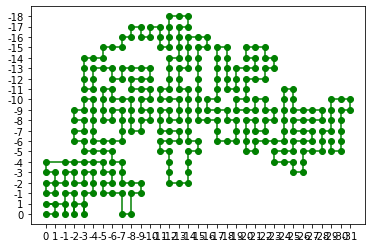

In [21]:
#lo presento en el plot
pyplot.plot(data[0],data[1],'o-', color="green")

Podríamos hacerlo para otra proteína como la insulina, podeis probarlo pero teneis que ubicar en el mismo notebook las funciones que se usan en simulating annealing para ejecutarlo.

Temperature  100  Best score:  1590.980000000001
Temperature  99.0  Best score:  1153.7099999999994
Temperature  98.01  Best score:  1153.7099999999994
Temperature  97.0299  Best score:  1081.4499999999996
Temperature  96.059601  Best score:  1058.4199999999996
Temperature  95.09900499  Best score:  1058.4199999999996
Temperature  94.1480149401  Best score:  1052.2499999999995
Temperature  93.206534790699  Best score:  1052.2499999999995
Temperature  92.27446944279201  Best score:  1052.2499999999995
Temperature  91.35172474836409  Best score:  1052.2499999999995
Temperature  90.43820750088045  Best score:  1052.2499999999995
Temperature  89.53382542587164  Best score:  1052.2499999999995
Temperature  88.63848717161292  Best score:  982.9799999999994
Temperature  87.75210229989679  Best score:  982.9799999999994
Temperature  86.87458127689783  Best score:  982.9799999999994
Temperature  86.00583546412885  Best score:  982.9799999999994
Temperature  85.14577710948755  Best score:  982.9

Temperature  26.271258725022847  Best score:  634.3099999999995
Temperature  26.00854613777262  Best score:  634.3099999999995
Temperature  25.748460676394892  Best score:  634.3099999999995
Temperature  25.490976069630943  Best score:  613.2699999999998
Temperature  25.23606630893463  Best score:  613.2699999999998
Temperature  24.983705645845284  Best score:  613.2699999999998
Temperature  24.73386858938683  Best score:  613.2699999999998
Temperature  24.48652990349296  Best score:  613.2699999999998
Temperature  24.24166460445803  Best score:  613.2699999999998
Temperature  23.99924795841345  Best score:  613.2699999999998
Temperature  23.759255478829314  Best score:  613.2699999999998
Temperature  23.52166292404102  Best score:  524.2699999999999
Temperature  23.28644629480061  Best score:  524.2699999999999
Temperature  23.053581831852604  Best score:  524.2699999999999
Temperature  22.82304601353408  Best score:  524.2699999999999
Temperature  22.59481555339874  Best score:  524.

Temperature  7.041924650516153  Best score:  313.87000000000006
Temperature  6.971505404010991  Best score:  313.87000000000006
Temperature  6.901790349970882  Best score:  313.87000000000006
Temperature  6.832772446471173  Best score:  313.87000000000006
Temperature  6.764444722006462  Best score:  313.87000000000006
Temperature  6.696800274786397  Best score:  313.87000000000006
Temperature  6.6298322720385325  Best score:  313.87000000000006
Temperature  6.563533949318147  Best score:  313.87000000000006
Temperature  6.497898609824966  Best score:  313.87000000000006
Temperature  6.432919623726716  Best score:  313.87000000000006
Temperature  6.3685904274894485  Best score:  313.87000000000006
Temperature  6.304904523214554  Best score:  313.87000000000006
Temperature  6.2418554779824085  Best score:  313.87000000000006
Temperature  6.1794369232025845  Best score:  313.87000000000006
Temperature  6.117642553970558  Best score:  313.87000000000006
Temperature  6.056466128430853  Best

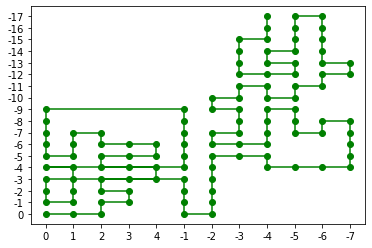

In [166]:
insulin='MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'

result2 = simulating_annealing(insulin,100,0.99,300,300)
dic_coordenadas2 = get_spatial_dic(result2[0], result2[1])
coordenadas2 = list(dic_coordenadas2.keys())
data2=plot_data(coordenadas2)
pyplot.plot(data2[0],data2[1],'o-', color="green")
